<h2>Payment Fraud Detection</h2>
<h3>EDA - Exploratory Data Analysis</h3>
<h4>Author: Akshay Pandurang Paunikar</h4

In [72]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
# set the working directory
import io
%cd "datasets/"

[WinError 2] The system cannot find the file specified: 'datasets/'
e:\iNeuron\Projects\Payment_Fraud_Detection\notebook\datasets


In [74]:
# read the data
data = pd.read_csv("Payment_Fraud.csv")
data.head()

,AccountAgeDays,NumItems,localTime,PaymentMethod,PaymentMethodAgeDays,Label
0,29,1,4.75,paypal,28.2,0
1,725,1,4.74,storecredit,0.0,0
2,845,1,4.92,creditcard,0.0,0
3,503,1,4.89,creditcard,0.0,0
4,2000,1,5.04,creditcard,0.0,0


In [75]:
# dimensions
data.shape

(39221, 6)

In [76]:
# datatypes
data.dtypes

AccountAgeDays            int64
NumItems                  int64
localTime               float64
PaymentMethod            object
PaymentMethodAgeDays    float64
Label                     int64
dtype: object

In [77]:
# descriptive statistics
data.describe().round(2)

,AccountAgeDays,NumItems,localTime,PaymentMethodAgeDays,Label
count,39221.00,39221.00,39221.00,39221.00,39221.00
mean,857.56,1.08,4.75,122.64,0.01
std,804.79,0.57,0.39,283.57,0.12
min,1.00,1.00,0.42,0.00,0.00
25%,72.00,1.00,4.74,0.00,0.00
50%,603.00,1.00,4.89,0.01,0.00
75%,1804.00,1.00,4.96,87.51,0.00
max,2000.00,29.00,5.04,1999.58,1.00


In [78]:
# concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccountAgeDays        39221 non-null  int64  
 1   NumItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   PaymentMethod         39221 non-null  object 
 4   PaymentMethodAgeDays  39221 non-null  float64
 5   Label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [79]:
# check for duplicates
data.duplicated().sum()

8750

In [80]:
# drop duplicates
data = data.drop_duplicates()

In [81]:
# check for duplicates again
data.duplicated().sum()

0

In [82]:
# check for null/missing values
data.isnull().sum()

AccountAgeDays          0
NumItems                0
localTime               0
PaymentMethod           0
PaymentMethodAgeDays    0
Label                   0
dtype: int64

In [83]:
data['Label'] = data['Label'].map({0:"Good", 1:"Fraud"})
data.head()

,AccountAgeDays,NumItems,localTime,PaymentMethod,PaymentMethodAgeDays,Label
0,29,1,4.75,paypal,28.2,Good
1,725,1,4.74,storecredit,0.0,Good
2,845,1,4.92,creditcard,0.0,Good
3,503,1,4.89,creditcard,0.0,Good
4,2000,1,5.04,creditcard,0.0,Good


Before we move towards exploratory data analysis we will first separate fraud data and good data and analyze them separately.

In [84]:
# separate good data and fraud data
good_data = data[data['Label']=="Good"]
fraud_data = data[data['Label']=="Fraud"]

### Exploratory Data Analysis:

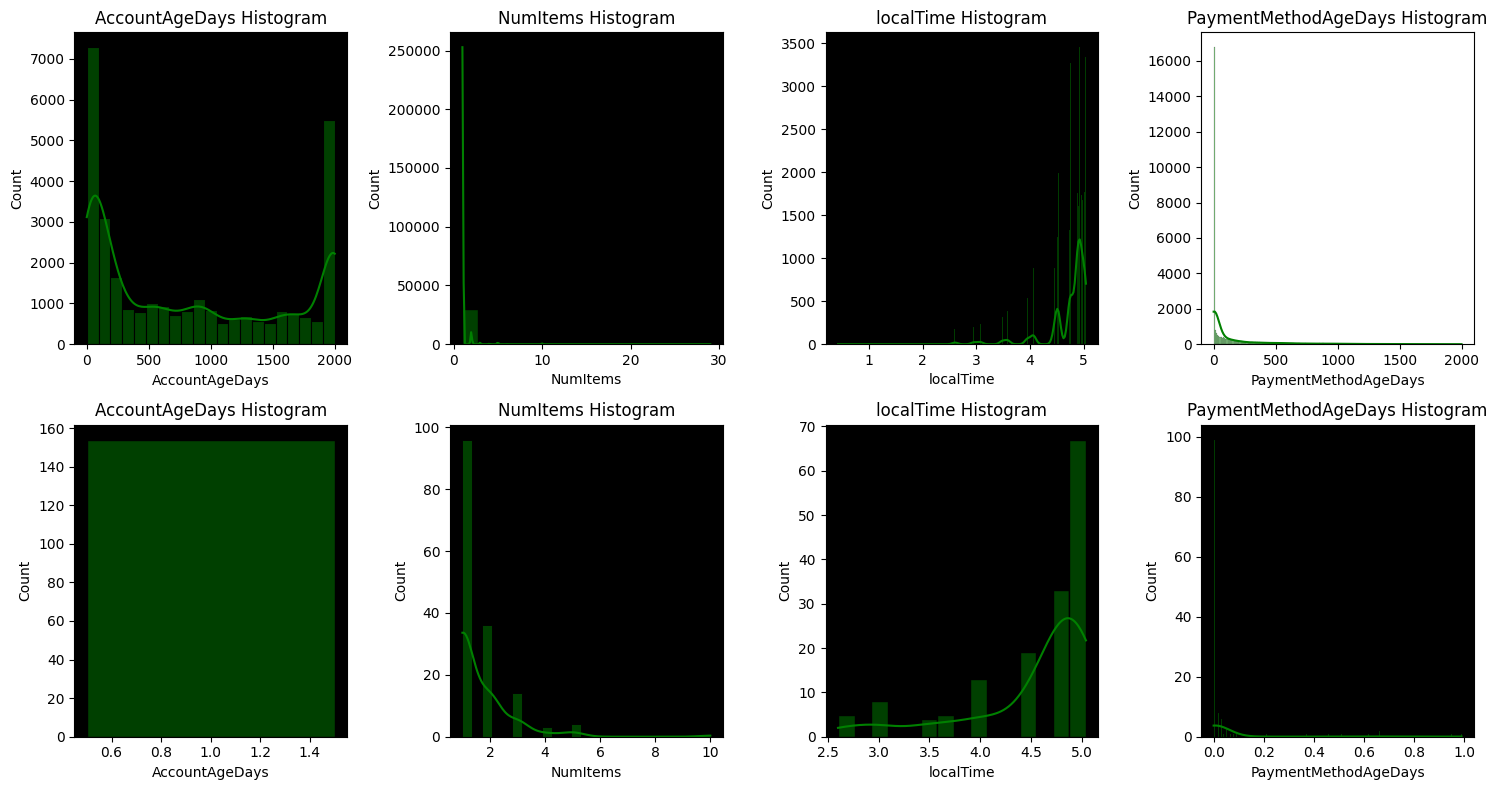

In [85]:
plt.figure(figsize=(15,8))

# Good data
# AccountAgeDays

ax1 = plt.subplot2grid((2,4),(0,0))

sns.histplot(data=good_data, x='AccountAgeDays',kde=True, color='green', ax=ax1)
ax1.set_facecolor('black')
plt.title("AccountAgeDays Histogram")

# NumItems

ax2 = plt.subplot2grid((2,4),(0,1))

sns.histplot(data=good_data, x='NumItems',kde=True, color='green', ax=ax2)
ax2.set_facecolor('black')
plt.title("NumItems Histogram")

# localTime

ax3 = plt.subplot2grid((2,4),(0,2))

sns.histplot(data=good_data, x='localTime',kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("localTime Histogram")

# PaymentMethodAgeDays

ax4 = plt.subplot2grid((2,4),(0,3))

sns.histplot(data=good_data, x='PaymentMethodAgeDays',kde=True, color='green', ax=ax4)
ax3.set_facecolor('black')
plt.title("PaymentMethodAgeDays Histogram")

# Fraud data
# AccountAgeDays

ax5 = plt.subplot2grid((2,4),(1,0))

sns.histplot(data=fraud_data, x='AccountAgeDays',kde=True, color='green', ax=ax5)
ax5.set_facecolor('black')
plt.title("AccountAgeDays Histogram")

# NumItems

ax6 = plt.subplot2grid((2,4),(1,1))

sns.histplot(data=fraud_data, x='NumItems',kde=True, color='green', ax=ax6)
ax6.set_facecolor('black')
plt.title("NumItems Histogram")

# localTime

ax7 = plt.subplot2grid((2,4),(1,2))

sns.histplot(data=fraud_data, x='localTime',kde=True, color='green', ax=ax7)
ax7.set_facecolor('black')
plt.title("localTime Histogram")

# PaymentMethodAgeDays

ax8 = plt.subplot2grid((2,4),(1,3))

sns.histplot(data=fraud_data, x='PaymentMethodAgeDays',kde=True, color='green', ax=ax8)
ax8.set_facecolor('black')
plt.title("PaymentMethodAgeDays Histogram")

plt.tight_layout()
plt.show()

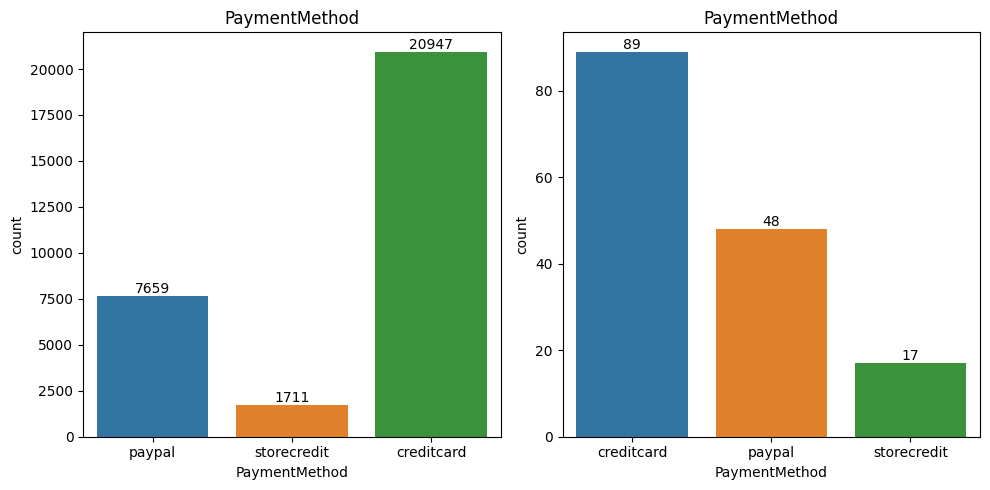

In [86]:
plt.figure(figsize=(10,5))

# PaymentMethod
ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(x='PaymentMethod', data=good_data, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("PaymentMethod")

# PaymentMethod
ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(x='PaymentMethod', data=fraud_data, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("PaymentMethod")

plt.tight_layout()
plt.show()

#### Combined Data Analysis:

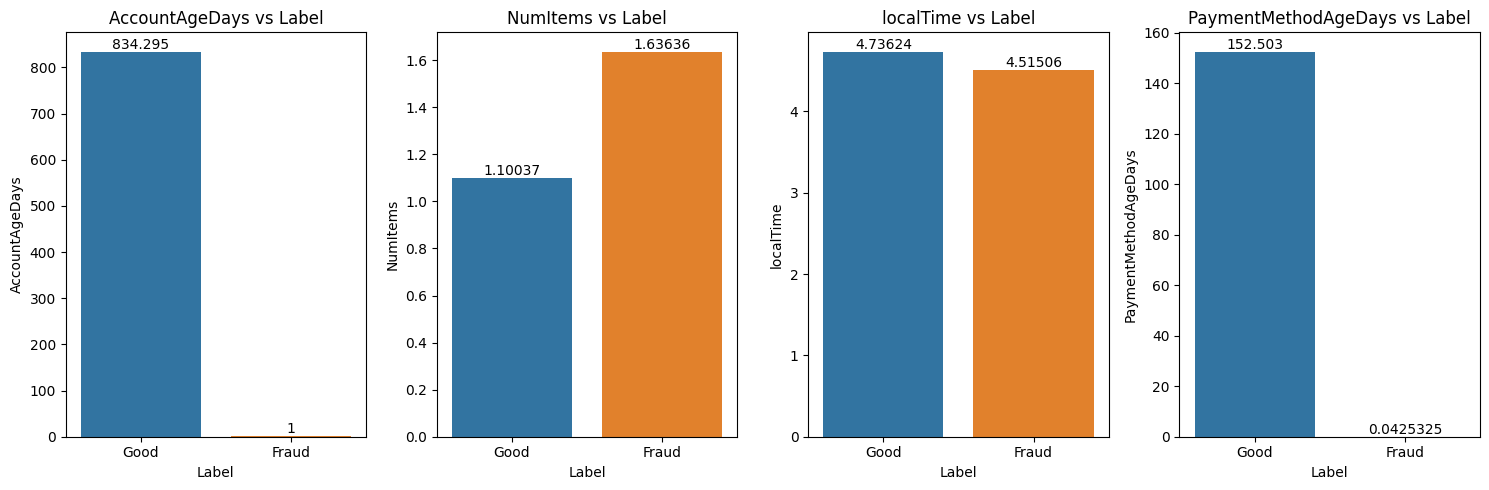

In [87]:
plt.figure(figsize=(15,5))

# AccountAgeDays

ax1 = plt.subplot2grid((1,4),(0,0))

sns.barplot(data=data, x='Label', y='AccountAgeDays', estimator=np.mean, ci=None, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("AccountAgeDays vs Label")

# NumItems

ax2 = plt.subplot2grid((1,4),(0,1))

sns.barplot(data=data, x='Label', y='NumItems', estimator=np.mean, ci=None, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("NumItems vs Label")

# localTime

ax3 = plt.subplot2grid((1,4),(0,2))

sns.barplot(data=data, x='Label', y='localTime', estimator=np.mean, ci=None, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("localTime vs Label")

# PaymentMethodAgeDays

ax4 = plt.subplot2grid((1,4),(0,3))

sns.barplot(data=data, x='Label', y='PaymentMethodAgeDays', estimator=np.mean, ci=None, ax=ax4)
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("PaymentMethodAgeDays vs Label")

plt.tight_layout()
plt.show()

In [88]:
# Label
data['Label'].value_counts()

Good     30317
Fraud      154
Name: Label, dtype: int64

In [89]:
# save the data
data.to_csv("final_data.csv", index=False, header=True)